In [3]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import  Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import mean_squared_error

In [23]:
df = pd.read_excel(r"C:\Users\user\Downloads\CocaCola_Sales_Rawdata (1).xlsx" , header=0 , parse_dates=True)

In [24]:
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [26]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [27]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [28]:
df.duplicated().any()

False

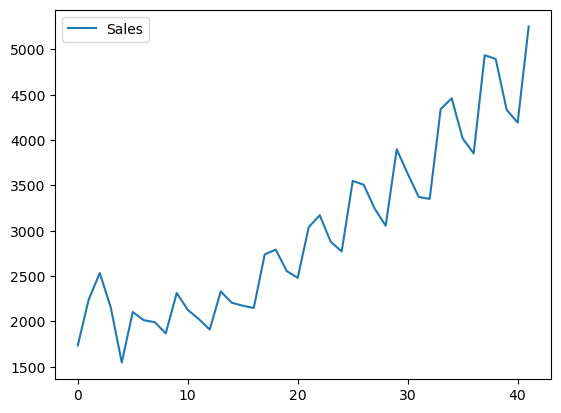

In [29]:
df.plot()
plt.show()

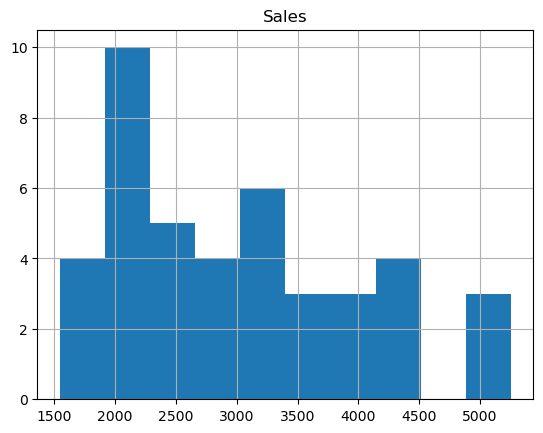

In [30]:
df.hist()
plt.show()

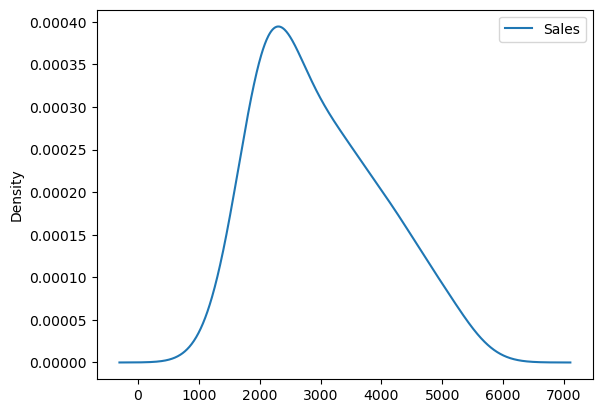

In [31]:
df.plot(kind = 'kde')
plt.show()

In [37]:
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


<Axes: >

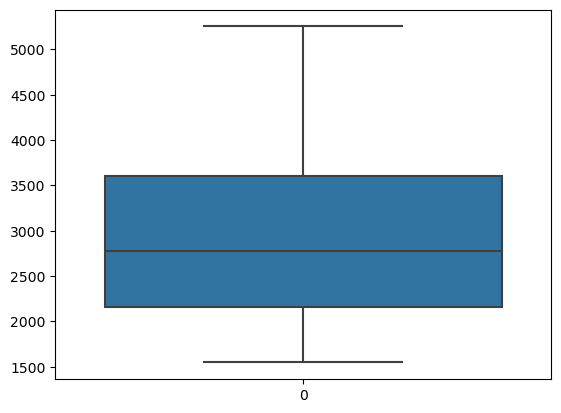

In [39]:
sn.boxplot(df['Sales'])

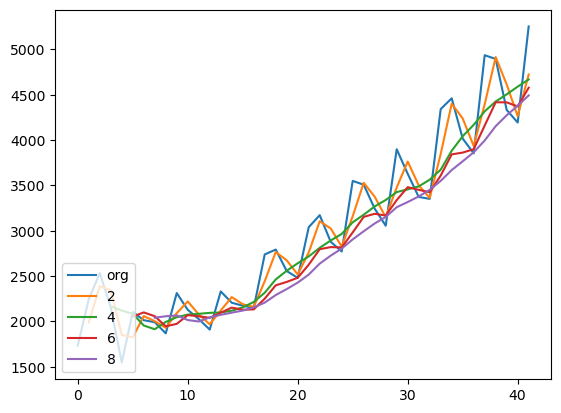

In [42]:
df.Sales.plot(label = "org")
for i in range(2, 10 , 2):
    df["Sales"].rolling(i).mean().plot(label=str(i))
    plt.legend(loc = 3)

In [50]:
df.head(5)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [53]:
quarter = ['Q1','Q2', 'Q3' , 'Q4']

quarter = pd.DataFrame(quarter)

In [56]:
Quaters = pd.DataFrame(np.tile(quarter,(11 , 1)))


In [58]:
df = pd.concat([df , Quaters] , axis =1)


In [59]:
df = df.dropna()

In [60]:
df.columns = ['Quater' , 'Sales' , 'quarter']

In [61]:
## Dummies variable

In [87]:
quarter_dummies = pd.get_dummies(df['Quater'])
df = pd.concat([df  , quarter_dummies]  , axis = 1)

df['t'] = np.arange(1,43)
df['t_sq'] = df['t']*df['t']
df['log_sales'] = np.log(df['Sales'])

In [88]:
Train = df[0:30]
Test = df[30 :]

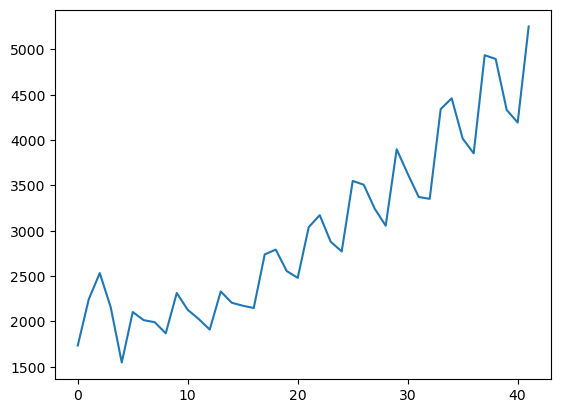

In [89]:
plt.plot(df.iloc[: , 1])
Test.set_index(np.arange(1 , 13) , inplace = True)

In [90]:
import statsmodels.formula.api as smf

In [91]:
linear_model = smf.ols("Sales~t" , data = Train).fit()

In [92]:
pred_lin = linear_model.predict(Test['t'])

In [93]:
pred_lin

1     3367.902182
2     3423.629551
3     3479.356920
4     3535.084289
5     3590.811658
6     3646.539027
7     3702.266396
8     3757.993765
9     3813.721133
10    3869.448502
11    3925.175871
12    3980.903240
dtype: float64

In [94]:
error = Test['Sales'] - pred_lin

In [95]:
rmse_linear = np.sqrt(np.mean(error**2))

In [96]:
rmse_linear

714.0144483281305

In [97]:
## Quadratic model

In [98]:
quad_model = smf.ols("Sales~t+t_sq" , data = Train).fit()

In [99]:
pred_model_quad = quad_model.predict(Test[['t','t_sq']])

In [100]:
error_quad = Test['Sales'] - pred_model_quad

In [101]:
rmse_quad = np.sqrt(np.mean(error_quad**2))

In [102]:
rmse_quad

646.2715428312007

In [109]:
## Exponential model

exp_model = smf.ols('log_sales~t' , data = Train).fit()

In [110]:
predict_model = exp_model.predict(Test['t'])

In [111]:
error = Test['Sales']-predict_model

In [112]:
rmse_exp = np.sqrt(np.mean(error**2))

In [113]:
rmse_exp

4252.188990972336

## Minimum RMSE Value for quadratic model, that is why it is more preffered over the rest of two models

<Axes: xlabel='Quater', ylabel='Sales'>

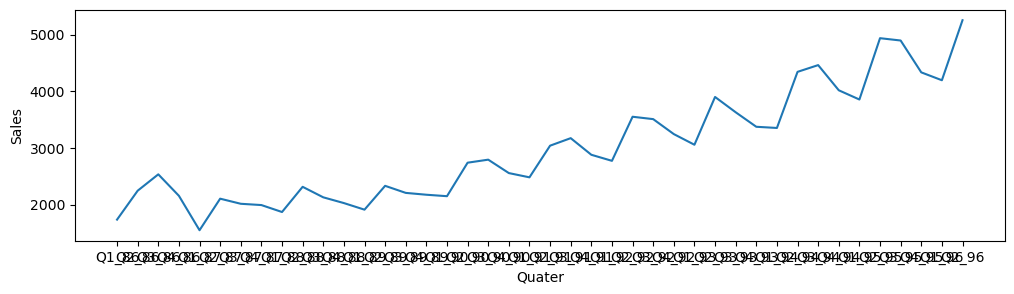

In [116]:
plt.figure(figsize = (12 , 3))
sn.lineplot( x = 'Quater' , y = 'Sales' ,  data = df)